In [ ]:
#RADICAL-Pilot on Blue Waters
Mark Santcroos <mark.santcroos@rutgers.edu>

In [371]:
import pandas as pd

In [389]:
# 'Magic' commands
%matplotlib inline
#%pylab inline
format='svg' # pdf, png, svg
%config InlineBackend.figure_formats=[format]

In [390]:
# The "source" of all data
store = pd.HDFStore('store.h5')

Data is stored as:
- SESSIONID/config
- SESSIONID/session
- SESSIONID/pilots
- SESSIONID/units

In [391]:
#session_names = [r._v_name for r in store.root]
session_names = set([x.split('/', 2)[1] for x in store.keys()])

In [392]:
session_names

{'rp.session.netbook.mark.016525.0027',
 'rp.session.netbook.mark.016525.0028',
 'rp.session.netbook.mark.016525.0030',
 'rp.session.netbook.mark.016525.0031',
 'rp.session.netbook.mark.016525.0032',
 'rp.session.netbook.mark.016525.0033',
 'rp.session.netbook.mark.016527.0009',
 'rp.session.netbook.mark.016528.0001',
 'rp.session.netbook.mark.016528.0002',
 'rp.session.netbook.mark.016528.0003',
 'rp.session.netbook.mark.016528.0004'}

In [393]:
sessions = [store['%s/session' % s_name] for s_name in session_names]

In [394]:
sessions

[   finished  n_pilots  n_units                                  sid  \
 0   724.054         1        0  rp.session.netbook.mark.016528.0004   
 
         started  
 0  1.428056e+09  ,
    finished  n_pilots  n_units                                  sid  \
 0   344.727         1        0  rp.session.netbook.mark.016528.0002   
 
         started  
 0  1.428044e+09  ,
    finished  n_pilots  n_units                                  sid  \
 0   243.056         1        0  rp.session.netbook.mark.016528.0003   
 
         started  
 0  1.428056e+09  ,
    finished  n_pilots  n_units                                  sid  \
 0  1896.206         1        0  rp.session.netbook.mark.016528.0001   
 
         started  
 0  1.428042e+09  ,
    finished  n_pilots  n_units                                  sid  \
 0   321.299         1        0  rp.session.netbook.mark.016525.0027   
 
         started  
 0  1.427806e+09  ,
    finished  n_pilots  n_units                                  sid  \
 0 

In [395]:
orte0 = store.get('rp.session.netbook.mark.016525.0027/units')
aprun0 = store.get('rp.session.netbook.mark.016525.0028/units')
ccm0 = store.get('rp.session.netbook.mark.016525.0030/units')

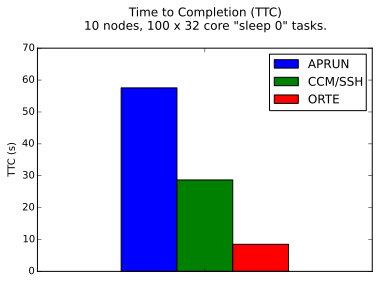

In [396]:
orte0_ttc = max(orte0['Done']) - min(orte0['Executing'])
ccm0_ttc = max(ccm0['Done']) - min(ccm0['Executing'])
aprun0_ttc = max(aprun0['Done']) - min(aprun0['Executing'])
#df = pandas.DataFrame([aprun0_ttc, ccm0_ttc, orte0_ttc], ['aprun', 'ccm', 'orte'])
#df = pandas.DataFrame([[1,2,3]])
df = pd.DataFrame([{'APRUN': aprun0_ttc, 'CCM/SSH': ccm0_ttc, 'ORTE': orte0_ttc}])
ax = df.plot(kind='bar', )
ax.set_ylabel("TTC (s)")
#ax.set_xlabel('Method')
ax.set_title("Time to Completion (TTC)\n10 nodes, 100 x 32 core \"sleep 0\" tasks.\n")
grid('off')
ax.set_xticklabels("")
ax.set_ylim(0,70)
savefig('ttc.pdf')

In [397]:
orte0['Runtime'] = orte0['Done'] - orte0['Executing']
aprun0['Runtime'] = aprun0['Done'] - aprun0['Executing']
ccm0['Runtime'] = ccm0['Done'] - ccm0['Executing']

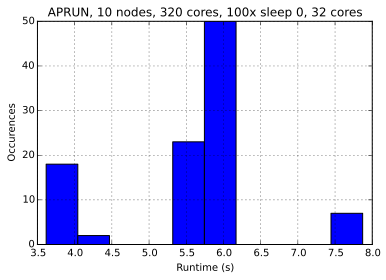

In [398]:
ax = aprun0['Runtime'].plot(kind='hist', title='APRUN, 10 nodes, 320 cores, 100x sleep 0, 32 cores')
ax.set_ylabel('Occurences')
ax.set_xlabel('Runtime (s)')

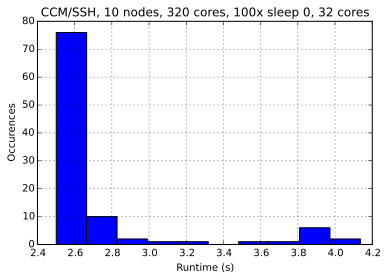

In [399]:
ax = ccm0['Runtime'].plot(kind='hist', title='CCM/SSH, 10 nodes, 320 cores, 100x sleep 0, 32 cores')
ax.set_ylabel('Occurences')
ax.set_xlabel('Runtime (s)')

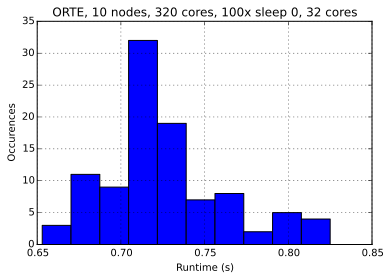

In [400]:
ax = orte0['Runtime'].plot(kind='hist', title='ORTE, 10 nodes, 320 cores, 100x sleep 0, 32 cores')
ax.set_ylabel('Occurences')
ax.set_xlabel('Runtime (s)')

#From here we lalala


In [401]:
#df = pandas.DataFrame([{'APRUN': aprun0_ttc, 'CCM/SSH': ccm0_ttc, 'ORTE': orte0_ttc}])
#orte0_cum_run = sum(orte0.Runtime) * 32
#orte
#orte0_idle = orte0_ttc * 320
#series = pandas.Series(3 * rand(4), index=['a', 'b', 'c', 'd'], name='series')
#series.plot(kind='pie', figsize=(6, 6))
#series = pandas.Series([aprun0])
#series.plot(kind='pie', figsize=(6,6))

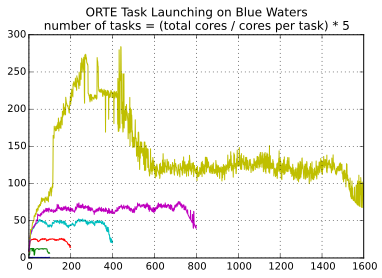

In [402]:
orte32 = store.get('/rp.session.netbook.mark.016525.0027/units')
orte32['Runtime'] = orte32['Done'] - orte32['Executing']
orte32mean = mean(orte32['Runtime'])
orte32['Runtime'].plot()

orte16 = store.get('/rp.session.netbook.mark.016528.0001/units')
orte16['Runtime'] = orte16['Done'] - orte16['Executing']
orte16mean = mean(orte16['Runtime'])
orte16['Runtime'].plot()

orte8 = store.get('/rp.session.netbook.mark.016528.0003/units')
orte8['Runtime'] = orte8['Done'] - orte8['Executing']
orte8mean = mean(orte8['Runtime'])
orte8['Runtime'].plot()

orte4 = store.get('/rp.session.netbook.mark.016528.0002/units')
orte4['Runtime'] = orte4['Done'] - orte4['Executing']
orte4mean = mean(orte4['Runtime'])
orte4['Runtime'].plot()

orte2 = store.get('/rp.session.netbook.mark.016528.0004/units')
orte2['Runtime'] = orte2['Done'] - orte2['Executing']
orte2mean = mean(orte2['Runtime'])
orte2['Runtime'].plot()

orte1 = store.get('/rp.session.netbook.mark.016527.0009/units')
orte1['Runtime'] = orte1['Done'] - orte1['Executing']
orte1mean = mean(orte1['Runtime'])
orte1['Runtime'].plot(title='ORTE Task Launching on Blue Waters\n'
                     'number of tasks = (total cores / cores per task) * 5')
savefig("launchtimes.png")


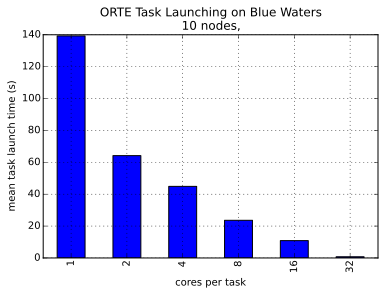

In [403]:
#dfmean = pandas.DataFrame([{'1': orte1mean, '2': orte2mean, '4': orte4mean, '16': orte16mean, '32': orte32mean}])
dfmean = pd.DataFrame([orte1mean, orte2mean, orte4mean, orte8mean, orte16mean, orte32mean], [1,2,4,8,16,32])

ax = dfmean[0].plot(kind='bar', title='ORTE Task Launching on Blue Waters\n'
                 '10 nodes,')
ax.set_xlabel("cores per task")
ax.set_ylabel("mean task launch time (s)")
savefig("meanlaunchtimes.png")

# Read Agent Profiling Data

In [404]:
DATA_DIR='/Users/mark/Documents/experiments/bluewaters/prof_data'

experiments = {
    '500cu_1core_10node_1ew': {
        'file': 'rp.session.netbook.mark.016541.0055-pilot.0000.prof',
        'cu_cores' : 1,
        'cu_count' : 500,
        'nodes': 10,
        'exec_workers': 1,
        'spawner': 'shell',
        'launcher': 'orte'
    },   
    '500cu_1core_10node_2ew': {
        'file': 'rp.session.netbook.mark.016541.0057-pilot.0000.prof',
        'cu_cores' : 1,
        'cu_count' : 500,
        'nodes': 10,
        'exec_workers': 2,
        'spawner': 'shell',
        'launcher': 'orte'
    },
    '500cu_1core_10node_4ew': {
        'file': 'rp.session.netbook.mark.016541.0058-pilot.0000.prof',
        'cu_cores' : 1,
        'cu_count' : 500,
        'nodes': 10,
        'exec_workers': 4,
        'spawner': 'shell',
        'launcher': 'orte'
    },
    '500cu_1core_10node_8ew': {
        'file': 'rp.session.netbook.mark.016541.0059-pilot.0000.prof',
        'cu_cores' : 1,
        'cu_count' : 500,
        'nodes': 10,
        'exec_workers': 8,
        'spawner': 'shell',
        'launcher': 'orte'
    },
    '500cu_32core_10node_1ew': {
        'file': 'rp.session.netbook.mark.016541.0056-pilot.0000.prof',
        'cu_cores' : 32,
        'cu_count' : 500,
        'nodes': 10,
        'exec_workers': 1,
        'spawner': 'shell',
        'launcher': 'orte'
        }
}

#def get_experiments(cu_cores=None, cu_count=None, nodes=None, exec_workers=None, spawner=None, launcher=None):
def get_experiments(filter):
    exp_ids = []
    for exp_name, exp_config in experiments.iteritems():
        match = True
        for filter_key, filter_val in filter.iteritems():
            if filter_val != exp_config[filter_key]:
                match = False
                break
        if match:
            exp_ids.append(exp_name)
    return exp_ids

def test_get_experiments():
    print get_experiments({
        'cu_cores': 1,
        'cu_count': 500,
        'nodes': 10,
    #    'exec_workers': 1,
        'spawner': 'shell',
        'launcher': 'orte'
    })
#test_get_experiments()

In [405]:
#
# Get raw CSV datasets as DataFrames based on selection filter
#
raw_datasets = {}
exp_ids = get_experiments({
        'cu_cores': 1,
        'cu_count': 500,
        'nodes': 10,
    #    'exec_workers': 1,
        'spawner': 'shell',
        'launcher': 'orte'
    })

for exp_id in exp_ids:
    raw_datasets[exp_id] = pd.read_csv(os.path.join(DATA_DIR, experiments[exp_id]['file']))

In [627]:
#
# Transpose raw DF into a CU oriented datastructure
# TODO: This needs to be converted to a DF straight away
#
units = {}
for exp, df in raw_datasets.iteritems():
    units[exp] = {}
    # Python
    #units[exp]['all'] = [x for x in df.uid[df.uid > 0].unique() if x.startswith('unit')]
    units[exp]['all'] = [x for x in df.uid.dropna().unique() if x.startswith('unit')]
    
    units[exp]['cloned']= [x for x in units[exp]['all'] if 'clone' in x]
    units[exp]['real'] = list(set(units[exp]['all']) - set(units[exp]['cloned']))
    # Pandas
    #uids_s = df['uid']
    #all_units_s = uids_s.loc[uids_s.str.startswith('unit.', na=False)].drop_duplicates()
    #units[exp]['all'] = set(all_units_s)
    #cloned_units_s = all_units_s.loc[all_units_s.str.contains('clone')]
    #units[exp]['cloned'] = set(cloned_units_s)
    #units[exp]['real'] = units[exp]['all'] - units[exp]['cloned']

for exp, u in units.iteritems():
    print "Experiment:'%s', all:'%d', real:'%d', cloned:'%d'" % \
        (exp, len(u['all']), len(u['real']), len(u['cloned']))

Experiment:'500cu_1core_10node_8ew', all:'500', real:'500', cloned:'0'
Experiment:'500cu_1core_10node_2ew', all:'500', real:'500', cloned:'0'
Experiment:'500cu_1core_10node_1ew', all:'500', real:'500', cloned:'0'
Experiment:'500cu_1core_10node_4ew', all:'500', real:'500', cloned:'0'


In [622]:
#
# TODO: Not used anymore?!?
#
# Convert the lists generated by the cell above into tuples
# TODO: Similar as above, this step needs to become obsolete
#
#subsets = {}
#tuples = {}
#for exp in exp_ids:
#    df = raw_datasets[exp]
#    subsets[exp] = df[df.uid == units[exp]['real'][0]][['component', 'event', 'message']]
#    tuples[exp] = list(subsets[exp].to_records(index=False))
#    
#    print "Experiment:%s, subsets:%d, tuples:%d" % (exp, len(subsets[exp]), len(tuples[exp]))

#Event Translation Table
This table is semi-manually crafted.

In [617]:
# "label", "component", "event", "message"
elements = [
    ('a_get_u',         'MainThread',       'get', 'MongoDB to Agent (PendingExecution)'),
    ('a_build_u',       'MainThread',       'Agent get unit meta', ''),
    ('a_mkdir_u',       'MainThread',       'Agent get unit mkdir', ''),
    ('a_notify_alloc',  'MainThread',       'put', 'Agent to update_queue (Allocating)'),
    ('a_to_s',          'MainThread',       'put', 'Agent to schedule_queue (Allocating)'),

    ('s_get_alloc',     'CONTINUOUS',       'get', 'schedule_queue to Scheduler (Allocating)'),
    ('s_alloc_failed',  'CONTINUOUS',       'schedule', 'allocation failed'),
    ('s_allocated',     'CONTINUOUS',       'schedule', 'allocated'),
    ('s_to_ewo',        'CONTINUOUS',       'put', 'Scheduler to execution_queue (Allocating)'),
    ('s_unqueue',       'CONTINUOUS',       'unqueue', 're-allocation done'),
    
    ('ewo_get',         'ExecWorker-',      'get', 'executing_queue to ExecutionWorker (Executing)'),
    ('ewo_launch',      'ExecWorker-',      'ExecWorker unit launch', ''),
    ('ewo_spawn',       'ExecWorker-',      'ExecWorker spawn', ''),
    ('ewo_script',      'ExecWorker-',      'launch script constructed', ''),
    ('ewo_pty',         'ExecWorker-',      'spawning passed to pty', ''),  
    ('ewo_notify_exec', 'ExecWorker-',      'put', 'ExecWorker to update_queue (Executing)'),
    ('ewo_to_ewa',      'ExecWorker-',      'put', 'ExecWorker to watcher (Executing)'),
    
    ('ewa_get',         'ExecWatcher-',     'get', 'ExecWatcher picked up unit'),
    ('ewa_complete',    'ExecWatcher-',     'execution complete', ''),
    ('ewa_notify_so',   'ExecWatcher-',     'put', 'ExecWatcher to update_queue (StagingOutput)'),
    ('ewa_to_sow',      'ExecWatcher-',     'put', 'ExecWatcher to stageout_queue (StagingOutput)'),
    
    ('sow_get_u',       'StageoutWorker-',  'get', 'stageout_queue to StageoutWorker (StagingOutput)'),
    ('sow_u_done',      'StageoutWorker-',  'final', 'stageout done'),
    ('sow_notify_done', 'StageoutWorker-',  'put', 'StageoutWorker to update_queue (Done)'),

    ('uw_get_alloc',    'UpdateWorker-',    'get', 'update_queue to UpdateWorker (Allocating)'),   
    ('uw_push_alloc',   'UpdateWorker-',    'unit update pushed (Allocating)', ''),
    ('uw_get_exec',     'UpdateWorker-',    'get', 'update_queue to UpdateWorker (Executing)'),
    ('uw_push_exec',    'UpdateWorker-',    'unit update pushed (Executing)', ''),
    ('uw_get_so',       'UpdateWorker-',    'get', 'update_queue to UpdateWorker (StagingOutput)'),
    ('uw_push_so',      'UpdateWorker-',    'unit update pushed (StagingOutput)', ''),
    ('uw_get_done',     'UpdateWorker-',    'get', 'update_queue to UpdateWorker (Done)'),
    ('uw_push_done',    'UpdateWorker-',    'unit update pushed (Done)', '')
]
print "Number of entries: %d" % len(elements)
[e[0] for e in elements]
#edf = pd.DataFrame(elements, columns=["label", "component", "event", "message"])

Number of entries: 32


['a_get_u',
 'a_build_u',
 'a_mkdir_u',
 'a_notify_alloc',
 'a_to_s',
 's_get_alloc',
 's_alloc_failed',
 's_allocated',
 's_to_ewo',
 's_unqueue',
 'ewo_get',
 'ewo_launch',
 'ewo_spawn',
 'ewo_script',
 'ewo_pty',
 'ewo_notify_exec',
 'ewo_to_ewa',
 'ewa_get',
 'ewa_complete',
 'ewa_notify_so',
 'ewa_to_sow',
 'sow_get_u',
 'sow_u_done',
 'sow_notify_done',
 'uw_get_alloc',
 'uw_push_alloc',
 'uw_get_exec',
 'uw_push_exec',
 'uw_get_so',
 'uw_push_so',
 'uw_get_done',
 'uw_push_done']

In [409]:
#
# Lookup tuples in dataframe
#
def tup2ts(df, uid, tup):
    #print uid
    #print tup
    all_for_uid = df[df.uid == uid].fillna('')
    val = all_for_uid[(all_for_uid.component.str.startswith(tup[1])) &
                      (all_for_uid.event == tup[2]) &
                      (all_for_uid.message == tup[3])].time
    try:
        return val.iloc[0]
    except Exception as e:
        return NaN

In [646]:
# Initialize empty values
indices = {}
info = {}
unit_datasets = {}

In [647]:
#
# 
#
for exp in exp_ids:
    if exp in indices and exp in info:
        continue
    indices[exp] = [unit for unit in units[exp]['real']] 
    info[exp] = [{t[0]:tup2ts(raw_datasets[exp], unit, t) for t in elements} for unit in units[exp]['real']]

    unit_datasets[exp] = pd.DataFrame(info[exp]) # , index=indices[exp]).sort_index()

    print 'Experiment:%s, index length:%d, info length:%d' % (exp, len(indices[exp]), len(info[exp]))

Experiment:500cu_1core_10node_8ew, index length:500, info length:500
Experiment:500cu_1core_10node_2ew, index length:500, info length:500
Experiment:500cu_1core_10node_1ew, index length:500, info length:500
Experiment:500cu_1core_10node_4ew, index length:500, info length:500


In [643]:
#
# Get ordered list of events for one CU ordered on a certain field
#
#unit_datasets['500cu_1core_10node_1ew'].sort('ewo_get').loc['unit.000370'].order()
def print_unit_ordered_list(exp_id, unit_id, order_key):
    print unit_datasets[exp_id].sort(order_key).loc[unit_id].order()

print_unit_ordered_list('500cu_1core_10node_1ew', 'unit.000370',  'ewo_get')    

a_get_u                           72.9723
a_build_u                         72.9724
a_mkdir_u                         72.9738
a_notify_alloc                    72.9738
a_to_s                            72.9744
s_get_alloc                       72.9758
s_allocated                       72.9775
s_to_ewo                          72.9779
uw_get_alloc                      73.0237
uw_push_alloc                     74.2833
ewo_get                           76.0052
ewo_launch                        76.0056
ewo_spawn                         76.0057
ewo_script                        76.0058
ewo_to_ewa                         76.357
ewo_pty                            76.357
ewo_notify_exec                   76.3571
uw_get_exec                       76.3975
uw_push_exec                      76.4225
ewa_get                           78.1834
ewa_complete                      78.1837
ewa_notify_so                     78.1848
ewa_to_sow                        78.1849
sow_get_u                         

#ExecWorker Scalability

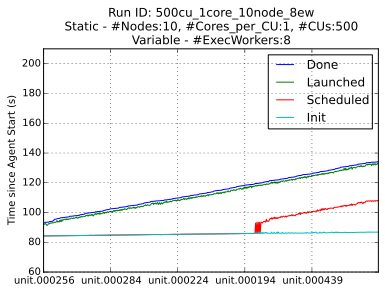

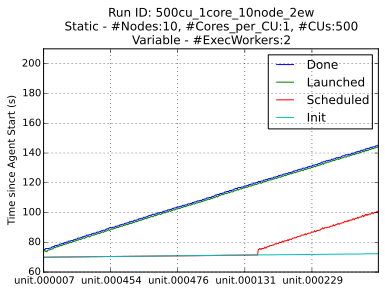

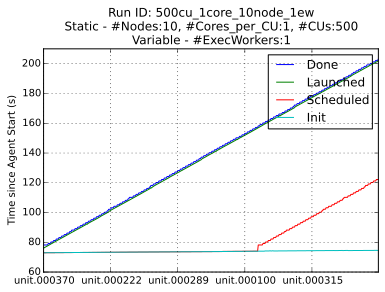

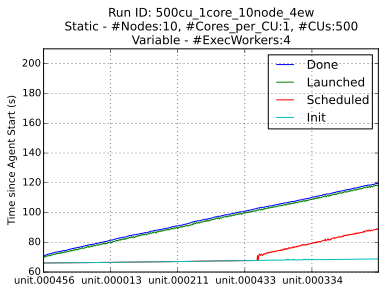

In [625]:
#
# Plot to illustrate the scalability of adding more exec workers
#
points = [
    'a_get_u',
#    'a_build_u',
#    'a_mkdir_u',
#    'a_notify_alloc',
#    'a_to_s',
#    's_get_alloc',
#    's_alloc_failed',
    's_allocated',
#    's_to_ewo',
#    's_unqueue',
    'ewo_get',
#    'ewo_launch',
#    'ewo_spawn',
#    'ewo_script',
 #   'ewo_pty',
#    'ewo_notify_exec',
#    'ewo_to_ewa',
#    'ewa_get',
    'ewa_complete',
#    'ewa_notify_so',
#    'ewa_to_sow',
#    'sow_get_u',
#    'sow_u_done',
#    'sow_notify_done',
#    'uw_get_alloc',
#    'uw_push_alloc',
#    'uw_get_exec',
#    'uw_push_exec',
#    'uw_get_so',
#    'uw_push_so',
#    'uw_get_done',
#   'uw_push_done'
][::-1] # reverse, so that legend matches the stack

sort_key = 'ewa_complete' # Agent becomes aware of the unit for the first time
for exp, df in unit_datasets.iteritems():
    conf = experiments[exp]
    ax = df.sort(sort_key)[points].plot(kind='line', ylim=(60,210))
    ax.set_ylabel("Time since Agent Start (s)")
    ax.set_title('Run ID: %s\nStatic - #Nodes:%d, #Cores_per_CU:%d, #CUs:%d\nVariable - #ExecWorkers:%d' % (
            exp, conf['nodes'], conf['cu_cores'], conf['cu_count'], conf['exec_workers']))
    ax.legend(['Done', 'Launched', 'Scheduled', 'Init'])

In [641]:
sort_key = 'ewa_complete' # Agent becomes aware of the unit for the first time
df1 = pd.DataFrame()
for exp, df in unit_datasets.iteritems():
    df['experiment'] = exp
    df1 = df1 + df
    print df1.tail()
    #conf = experiments[exp]
    #ax = df.sort(sort_key)[points].plot(kind='line', ylim=(60,210))
    #ax.set_ylabel("Time since Agent Start (s)")
    #ax.set_title('Run ID: %s\nStatic - #Nodes:%d, #Cores_per_CU:%d, #CUs:%d\nVariable - #ExecWorkers:%d' % (
    #        exp, conf['nodes'], conf['cu_cores'], conf['cu_count'], conf['exec_workers']))
    #ax.legend(['Done', 'Launched', 'Scheduled', 'Init'])

             a_build_u  a_get_u  a_mkdir_u  a_notify_alloc  a_to_s  \
unit.000495        NaN      NaN        NaN             NaN     NaN   
unit.000496        NaN      NaN        NaN             NaN     NaN   
unit.000497        NaN      NaN        NaN             NaN     NaN   
unit.000498        NaN      NaN        NaN             NaN     NaN   
unit.000499        NaN      NaN        NaN             NaN     NaN   

             ewa_complete  ewa_get  ewa_notify_so  ewa_to_sow  ewo_get  \
unit.000495           NaN      NaN            NaN         NaN      NaN   
unit.000496           NaN      NaN            NaN         NaN      NaN   
unit.000497           NaN      NaN            NaN         NaN      NaN   
unit.000498           NaN      NaN            NaN         NaN      NaN   
unit.000499           NaN      NaN            NaN         NaN      NaN   

                ...      sow_u_done  uw_get_alloc  uw_get_done  uw_get_exec  \
unit.000495     ...             NaN           NaN      

#Derivatives

In [626]:
#
# Method to create a column based on two other columns using an operator
#
import operator

def create_column(df, lhs, rhs, operator):
    return operator(df[lhs], df[rhs])

In [414]:
#
# Add additional (derived) colums to dataframes
# 
for exp, df in unit_datasets.iteritems():
    unit_datasets[exp]['executor_queue'] = create_column(df, 'ewo_get', 's_to_ewo', operator.sub)
    unit_datasets[exp]['raw_runtime'] = create_column(df, 'ewa_complete', 'ewo_launch', operator.sub)
    unit_datasets[exp]['full_runtime'] = create_column(df, 'uw_push_done', 's_to_ewo', operator.sub)
    unit_datasets[exp]['watch_delay'] = create_column(df, 'ewa_get', 'ewo_to_ewa', operator.sub)
    unit_datasets[exp]['allocation'] = create_column(df, 's_allocated', 'a_to_s', operator.sub)

In [415]:
#
# Experiment TTC and Execution rate
#

for exp, df in unit_datasets.iteritems():
    #points = df.columns
    #points = ['a_to_s']
    ttc = df['ewa_complete'].max() - df['a_to_s'].min()
    avg = ttc/500
    print "Experiment: %s - ExecWorkers: %d - TTC: %d(s) - Rate: %f(exections/s) " % (exp, experiments[exp]['exec_workers'], ttc, 1/avg)

Experiment: 500cu_1core_10node_8ew - ExecWorkers: 8 - TTC: 50(s) - Rate: 9.957501(exections/s) 
Experiment: 500cu_1core_10node_2ew - ExecWorkers: 2 - TTC: 75(s) - Rate: 6.649670(exections/s) 
Experiment: 500cu_1core_10node_1ew - ExecWorkers: 1 - TTC: 130(s) - Rate: 3.838845(exections/s) 
Experiment: 500cu_1core_10node_4ew - ExecWorkers: 4 - TTC: 53(s) - Rate: 9.297292(exections/s) 


In [416]:
#
# Raw runtime statistics
#
for exp, df in unit_datasets.iteritems():
    #points = df.columns
    points = ['raw_runtime']
    print "Experiment: %s - ExecWorkers: %d - Mean: %f(s) - StdDev: %f" % (exp, experiments[exp]['exec_workers'], df[points].mean().iloc[0], df[points].std().iloc[0])

Experiment: 500cu_1core_10node_8ew - ExecWorkers: 8 - Mean: 1.646871(s) - StdDev: 0.361814
Experiment: 500cu_1core_10node_2ew - ExecWorkers: 2 - Mean: 1.049228(s) - StdDev: 0.302944
Experiment: 500cu_1core_10node_1ew - ExecWorkers: 1 - Mean: 0.991510(s) - StdDev: 0.301528
Experiment: 500cu_1core_10node_4ew - ExecWorkers: 4 - Mean: 1.217827(s) - StdDev: 0.310087


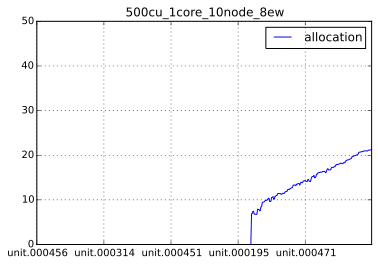

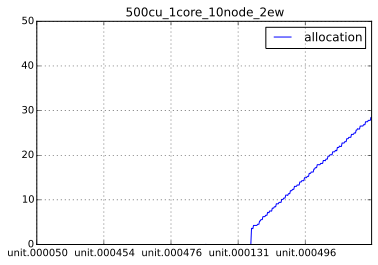

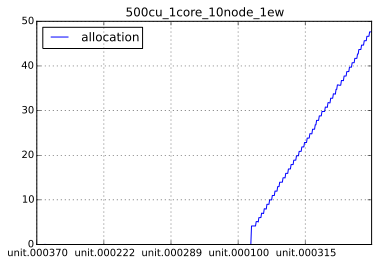

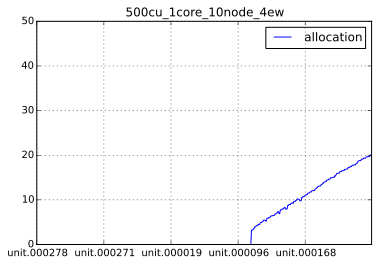

In [417]:
#
# Progression of startup duration over time.
# Note: There are 500 CUs here. On 320 cores. At 2/3 of the plot the cores get saturated.
#
for exp, df in unit_datasets.iteritems():

    points = ['allocation']
    df.sort('s_allocated')[points].plot(kind='line', title=exp, ylim=[0,50])    